<a href="https://colab.research.google.com/github/KamilShape/customer_segmentation/blob/main/customer_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Introducion**

### 1.1 Database analysis

Database: https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python

In [19]:
#visualisation
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#sklearn
from sklearn.cluster import KMeans

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
customers = pd.read_csv('/content/drive/MyDrive/customer_segmentation.csv')

In [5]:
customers.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [6]:
#checking null values
np.sum(customers.isnull().any(axis=1))

0

In [7]:
#average annual income
print(f"Average annual income: {customers['Annual Income (k$)'].mean()*1000} $")

Average annual income: 60560.0 $


In [8]:
#min and max income
print(f"Minimal annual income: {customers['Annual Income (k$)'].min()*1000} $")
print(f"Maximal annual income: {customers['Annual Income (k$)'].max()*1000} $")

Minimal annual income: 15000 $
Maximal annual income: 137000 $


In [9]:
#min and max age
print(f"Min age: {customers['Age'].min()}")
print(f"Max age: {customers['Age'].max()}")

Min age: 18
Max age: 70


<Axes: ylabel='Gender'>

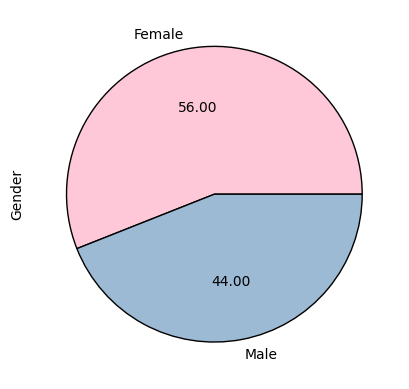

In [10]:
#customers gender
colors = ["#FEC8D8", "#9DBAD5"]
customers['Gender'].value_counts().plot.pie(autopct = '%.2f', colors = colors, wedgeprops = {"linewidth": 1, "edgecolor": "black"})

<Axes: xlabel='Annual Income (k$)', ylabel='Count'>

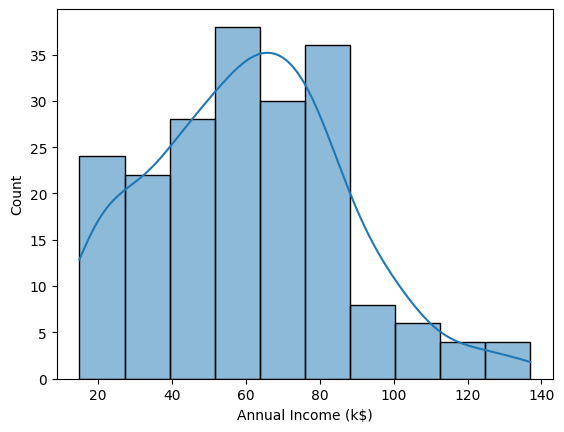

In [11]:
#histogram
sns.histplot(data=customers, x='Annual Income (k$)', kde=True)

In [12]:
#change gender to category
customers['Gender'] = customers['Gender'].astype('category')
customers['Gender'] = customers['Gender'].cat.codes

In [13]:
customers

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40
...,...,...,...,...,...
195,196,0,35,120,79
196,197,0,45,126,28
197,198,1,32,126,74
198,199,1,32,137,18


#**2. Data visualisation**

In [14]:
customers['Spending score range'] = pd.cut(customers['Spending Score (1-100)'], bins = [1,21,41,61,81,101], labels = ['1-20','21-40','41-60','61-80','81-100'])

In [15]:
customers['Annual income range'] = pd.cut(customers['Annual Income (k$)'], bins = [14,31,46,61,76,91,106,121,138], labels = ['15-30','31-45','46-60','61-75','76-90','91-105','106-120','> 120'])

<ipython-input-18-11e1326f1c2e>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-dark')


Text(0.5, 0, 'Range')

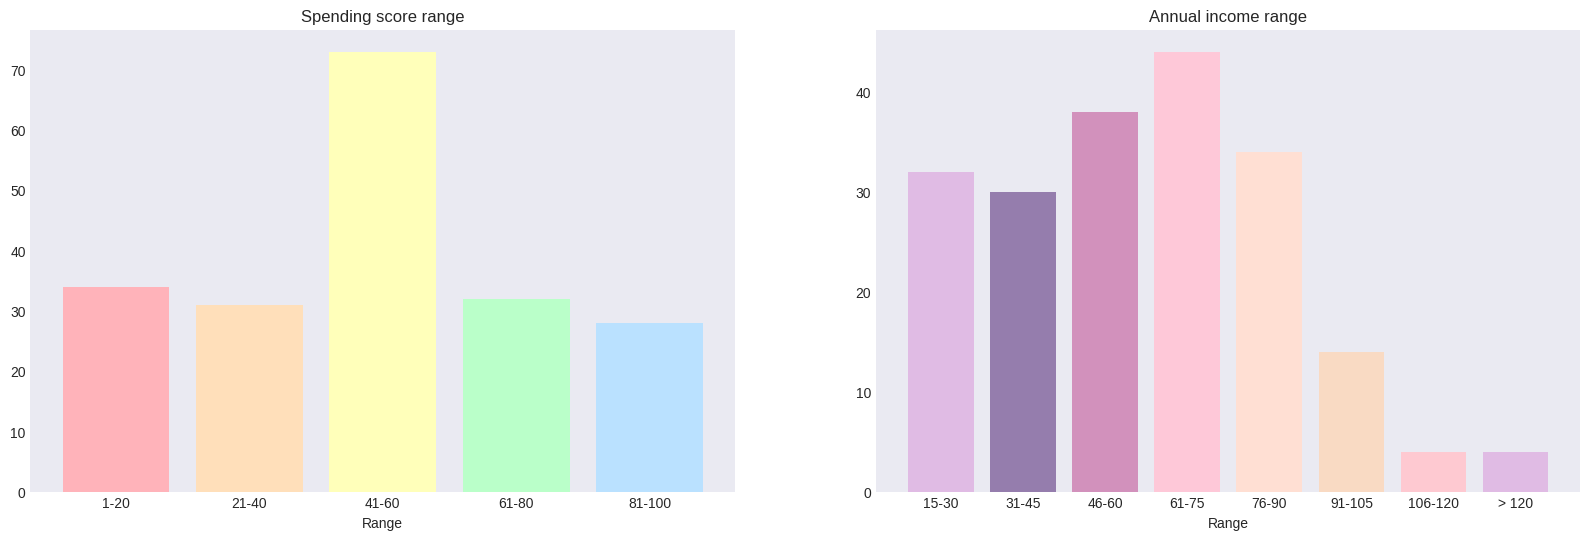

In [18]:
plt.style.use('seaborn-dark')
fig, ax = plt.subplots(1,2, figsize = (20,6))
color1 = ['#ffb3ba', '#ffdfba', '#ffffba', '#baffc9', '#bae1ff' ]
color2 = ['#E0BBE4', '#957DAD','#D291BC','#FEC8D8','#FFDFD3','#F9DAC3','#FEC9D1']
score_range_count = pd.DataFrame(customers['Spending score range'].value_counts().reset_index().sort_values(by='index'))
income_range_count = pd.DataFrame(customers['Annual income range'].value_counts().reset_index().sort_values(by='index'))
ax[0].bar(score_range_count['index'], score_range_count['Spending score range'], color=color1)
ax[0].set_title('Spending score range')
ax[0].set_xlabel('Range')
ax[1].bar(income_range_count['index'], income_range_count['Annual income range'], color=color2)
ax[1].set_title('Annual income range')
ax[1].set_xlabel('Range')

# **3. K - Means**

In [32]:
x = customers.iloc[:,1:5]

In [33]:
x

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
...,...,...,...,...
195,0,35,120,79
196,0,45,126,28
197,1,32,126,74
198,1,32,137,18


In [36]:
k_means = KMeans(n_clusters=3, random_state=30)

In [37]:
k_means.fit_predict(x)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int32)